### 1. Import libraries

In [2]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

### 2. Loading the dataset and using it with numpy iterator

In [3]:
data = tf.keras.utils.image_dataset_from_directory(
    './dataset_18',
    image_size=(256, 256),
    batch_size=32,
    shuffle=True
)

class_names = data.class_names

# To find out which index represent which class name
for index, class_name in enumerate(class_names):
    print(f'{index} = {class_name}')

# Converting to numpy arrays
data_iterator = data.as_numpy_iterator()
batch_images, batch_labels = data_iterator.next()

Found 480 files belonging to 4 classes.
0 = glioma
1 = meningioma
2 = notumor
3 = pituitary


### 3. Data preprocessing
#### 3.1. Scale image values to between 0 and 1 (instead of between 0 and 255), helps to generalize faster and produces better results

In [4]:
# Convert from integer labels to one-hot encoded labels
data = data.map(lambda x, y: (x/255, tf.one_hot(y, len(class_names))))

#### 3.2. Split data into training, testing and validation to ensure no overfitting
- Training for training the model
- Validation for fine-tuning the model
- Testing for testing the model

In [5]:
# How many batches? (In this case its 15 batches)
len(data)

15

In [6]:
# Batch sizes for each use case

# Approximately 70% for training
train_size = int(len(data)*.7)

# Approximately 20% for training
val_size = int(len(data)*.2) + 1

# Approximately 10% for training
test_size = int(len(data)*.1)

In [7]:
print(train_size)
print(val_size)
print(test_size)

10
4
1


In [8]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

### 4. Building the CNN model
#### 4.1. Adding the layers

In [9]:
model = Sequential()

# Add an input layer
model.add(Input(shape=(256, 256, 3)))

# Using convolution with 16 filters, size of filter is 3 pixels by 3 pixels, stride of 1 pixel, activation function ReLU
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Converts multidimensional output of the last pooling layer into a one-dimensional vector
model.add(Flatten())

# A fully connected layer with 256 neurons and ReLU activation
model.add(Dense(256, activation='relu'))

# A fully connected layer with 4 neuron and softmax activation for multi-class classification
# 4 neurons as each neuron corresponds to one of the classes
model.add(Dense(4, activation='softmax'))

#### 4.2. Compiling the model

In [10]:
# Using the adam optimizer and categorical_crossentropy loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,697,396 (14.10 MB)

 Trainable params: 3,697,396 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

### 5. Training the model

In [11]:
hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 363ms/step - accuracy: 0.2975 - loss: 1.4798 - val_accuracy: 0.5156 - val_loss: 1.1726
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 296ms/step - accuracy: 0.5829 - loss: 1.0740 - val_accuracy: 0.6797 - val_loss: 0.8471
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 296ms/step - accuracy: 0.6920 - loss: 0.7824 - val_accuracy: 0.7266 - val_loss: 0.7798
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 297ms/step - accuracy: 0.7359 - loss: 0.6717 - val_accuracy: 0.7578 - val_loss: 0.6897
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 301ms/step - accuracy: 0.7729 - loss: 0.5916 - val_accuracy: 0.7734 - val_loss: 0.5579
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 295ms/step - accuracy: 0.8705 - loss: 0.3488 - val_accuracy: 0.7969 - val_loss: 0.5932
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 302ms/step - accuracy: 0.8576 - loss: 0.3918 - val_accuracy: 0.9141 - val_loss: 0.2636
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 296ms/step - accuracy: 0.9542 - loss: 0.1848 - val_accuracy: 0.

### 6. Plot performance
#### 6.1. Plot training loss vs validation loss

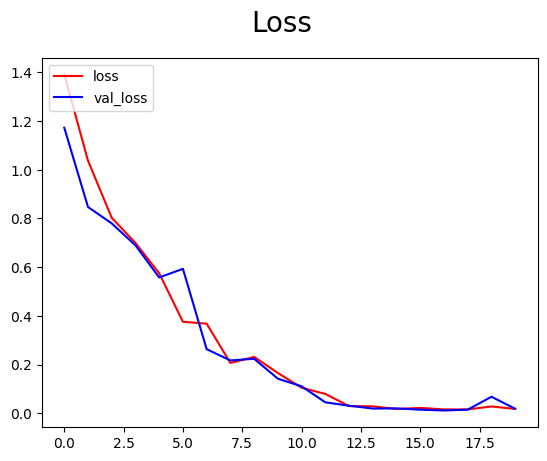

In [12]:
fig = plt.figure()
# Training loss
plt.plot(hist.history['loss'], color='red', label='loss')
# Validation loss
plt.plot(hist.history['val_loss'], color='blue', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

#### 6.2. Plot training accuracy vs validation accuracy

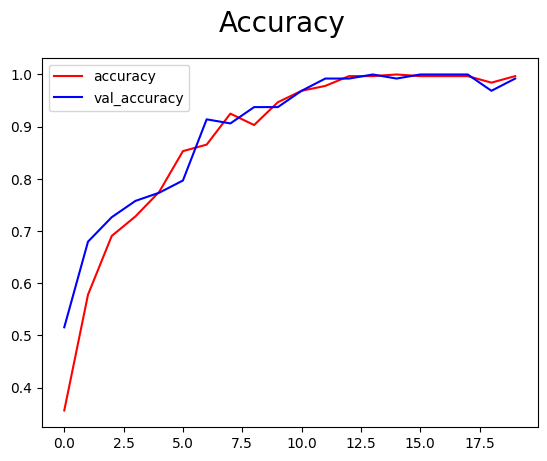

In [13]:
fig = plt.figure()
# Training accuracy
plt.plot(hist.history['accuracy'], color='red', label='accuracy')
# Validation accuracy
plt.plot(hist.history['val_accuracy'], color='blue', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

### 7. Evaluate performance

In [14]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [15]:
for batch in test.as_numpy_iterator():
    X, y = batch
    y_hat = model.predict(X)

    # print(y)
    # print(y_hat)

    # y_hat_classes = tf.argmax(y_hat, axis=1)
    # print(y_hat_classes.numpy())

    # Update metrics with full tensors
    pre.update_state(y, y_hat)
    re.update_state(y, y_hat)
    acc.update_state(y, y_hat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


In [16]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


In [19]:
eval = model.evaluate(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.9688 - loss: 0.0403
